### Problem Statement
We have a advertising dataset of a marketing agency. Goal is to develop a ML algorithm that predicts if a particular user will click on an advertisement. The dataset has 10 features:

'Daily Time Spent on Site', 
'Age', 
'Area Income',
'Daily Internet Usage', 
'Ad Topic Line',
'City',
'Male',
'Country',
Timestamp' 
'Clicked on Ad'.

**'Clicked on Ad'** is the categorical target feature, which has two possible values: 0 (user didn't click) and 1(user clicked). 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

### Import data

In [15]:
df = pd.read_csv('../input/d/tbyrnes/advertising/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [16]:
print(df.shape)
print('features in the dataset:', df.columns.tolist())

(1000, 10)
features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']


so we have total 1000 training examples, each with 10 features.

### Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:>

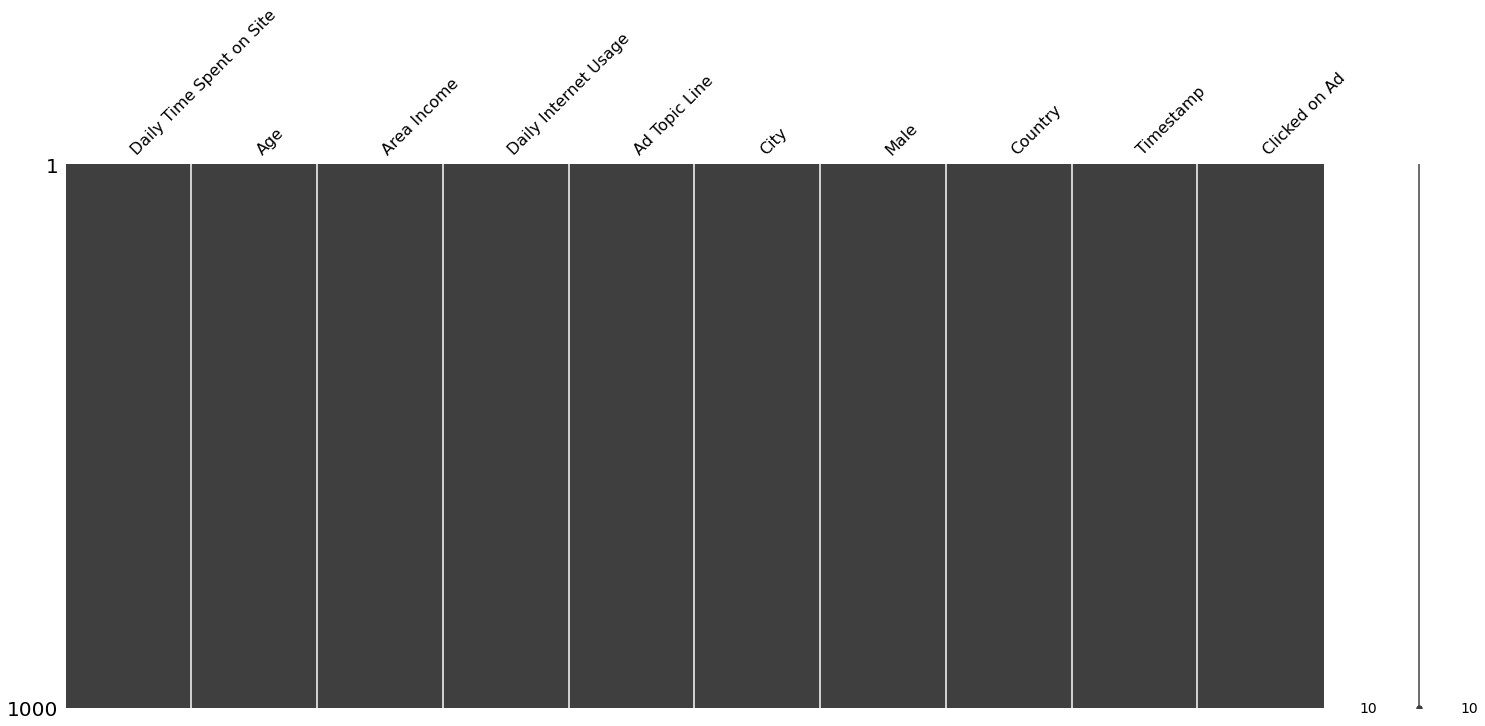

In [18]:
missingno.matrix(df)

From above two cells, we see there is no null values in the dataset, which is a good thing.

In [19]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [20]:
# Let's look at stats of the non-object features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Let's go over each of the non-object features one by one:
1. **Daily Time Spent on Site:** We see users spend between 32min to 91min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

2. **Age:** The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

3. **Area Income:** The minimum users income is around 13k and the maximum user income is 79k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

4. **Daily Internet Usage:** The daily internet use ranges from 104min to 269min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.

5. **Male:** 48% of the users are male. We will check if gender affects the rate of click on the ad. 

6. **Clicked on Ad:** From the cell above and the cell below, we see that 50% of the ads were clicked and 50% of the ad weren't clicked by the user. Which tells us that our ad dataset is balanced, which will have a positive affect on training accuracy. 

0    500
1    500
Name: Clicked on Ad, dtype: int64


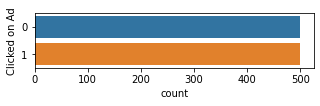

In [21]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (5,1))
sns.countplot(y ='Clicked on Ad', data = df)
print(df['Clicked on Ad'].value_counts())

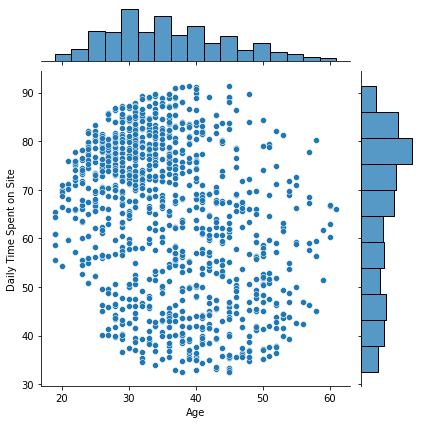

In [22]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df)

This plot tells us that the younger users spceially from age 20 to 40, spent most time on the site. So this group of users could be good target group for the ad campaign. We can also say that if a product is targetting a population whose age does not fall into the range 19 to 61, this site is not right platform to advertize the product. 

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

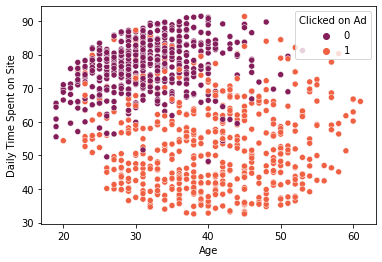

In [23]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site', 
                hue='Clicked on Ad', data=df, palette='rocket')

This plot tells us that all the users who spent less time on the site click on ad. On the other hand, among the 20 to 55 years user group who spent most time on the site apperently don't click on the ad, whereas the same user group who spents less time clicks on ad.

<AxesSubplot:xlabel='Age', ylabel='Daily Internet Usage'>

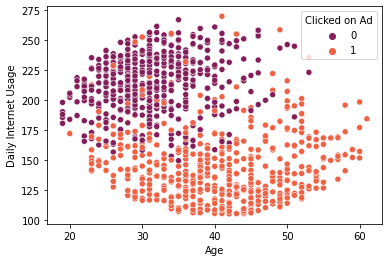

In [24]:
sns.scatterplot(x='Age',y='Daily Internet Usage', 
                hue='Clicked on Ad', data=df, palette='rocket')

Here we see users who are under age of 52 and who spent more time on the internet does not click on the ad, whereas the rest of the users, who usually spent less time on the internet clicks on the ad.

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>

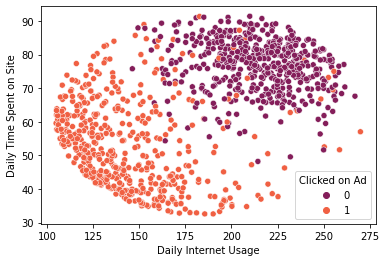

In [25]:
sns.scatterplot(x='Daily Internet Usage',y='Daily Time Spent on Site', 
                hue='Clicked on Ad', data=df, palette='rocket')

Again here we see users who usually spend less time on the internet are more likely to click on add and the users who spends more time on the internet and on the site are not. So the target users could be the ones who spend more time on the internet and also on the site.

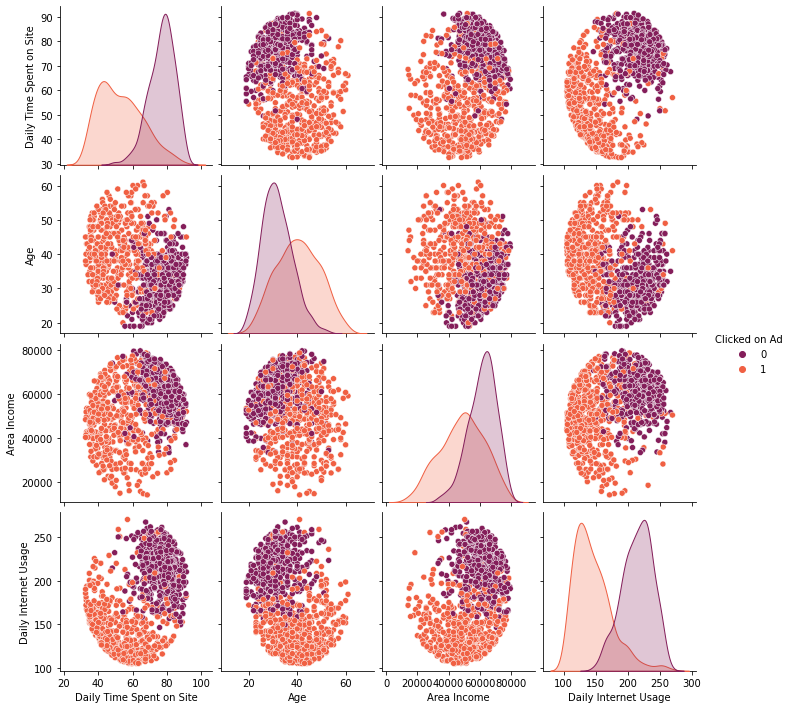

In [26]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                           'Age', 'Area Income',
                                           'Daily Internet Usage'],
            palette='rocket')

Pairplot represents the relationshi between the target feature and the explanatory features. 

We also see that users with higher area income who spends more time on the site does not click on ad also relatively younger users with higher income do not click on ads. So this group of users could be the target users. 

Again the users with higher area income who more likely to spend longer time on the site do not click on ad.



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


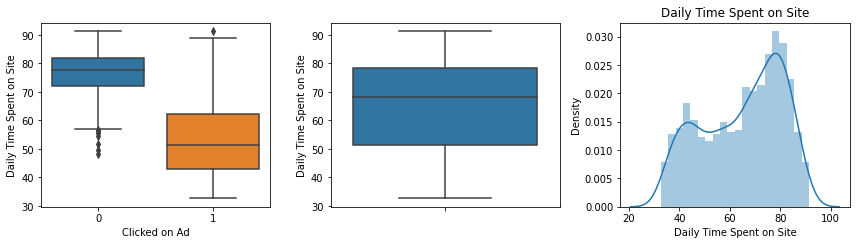

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


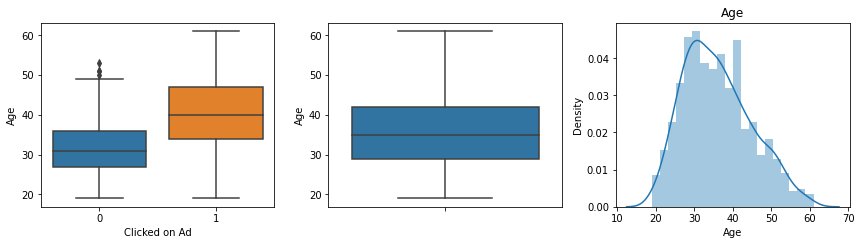

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


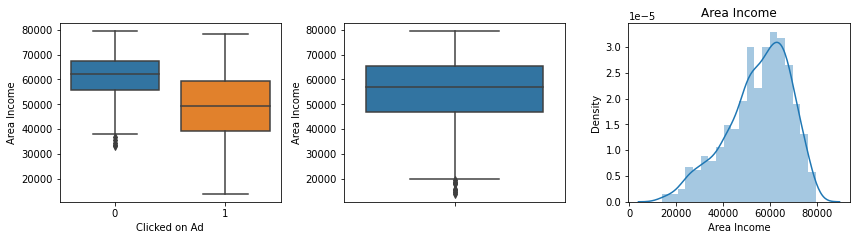

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


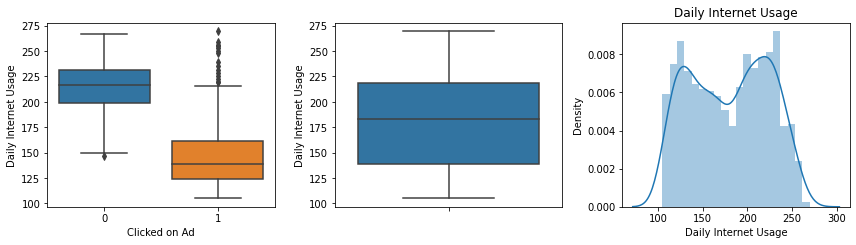

In [27]:
plots = ['Daily Time Spent on Site', 'Age', 
         'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df,x = 'Clicked on Ad', y=i)
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df,y=i)
    
    plt.subplot(2,3,3)
    sns.distplot(df[i],bins=20)
    plt.tight_layout()
    plt.title(i)
    plt.show()

<AxesSubplot:>

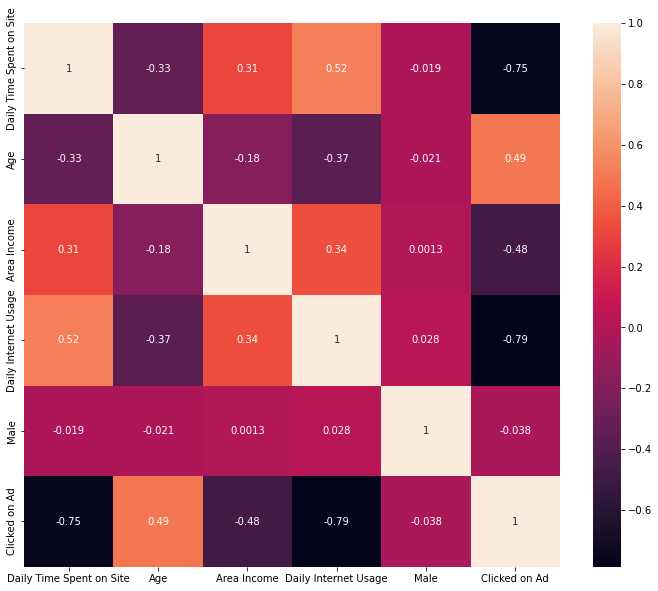

In [28]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

Here we see Daily Time Spent on Site, Age, Area Income, Daily Intenert Usage are highly correlate with the target variable. Which indicates they are important features and will be useful for ML model.

We also notice that Daily Time spent on site has strong correlation with other with daily intenet usage, Age, Area Inocme and so does daily internet usage. 

#### Now let's take a look at the object features: 
Ad Topic Line, City, Country, Timestamp 

In [29]:
#get the info of the Ad Topic Line
print(df['Ad Topic Line'].value_counts())

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64


In [30]:
object_features = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df[object_features].describe(include=['O'])  

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


From above cell we see that all ad topic lines are unique, which indicates this features has less chace of carying any useful information for the prediction model. There are 969 diffirent cities out of 237 countries. These indicates that the users are not from a spcecific demograhic but from all over the world. Even though we see France repeates 9 times, meaning highest number of visitors are from France but still it just 9 of them. 

Let's see if there is any other countries with same number of users.


In [31]:
pd.crosstab(index=df['Country'], columns='count').sort_values(
    ['count'], ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Since there are 237 countries in the dataset and no single country is too dominant. It might be better to remove these features from the dataset. 

In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Weekday,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,4,3


In [33]:
df['Month'][df['Clicked on Ad'] == 1].value_counts().sort_index()

1    69
2    83
3    74
4    74
5    79
6    71
7    50
Name: Month, dtype: int64

<AxesSubplot:>

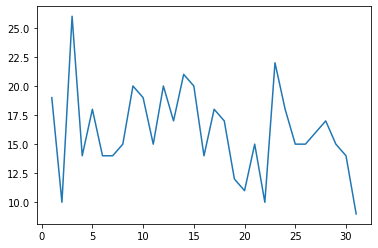

In [34]:
df['Day'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()

In [35]:
df['Weekday'][df['Clicked on Ad'] == 1].value_counts().sort_index()

0    72
1    55
2    79
3    79
4    71
5    64
6    80
Name: Weekday, dtype: int64

<AxesSubplot:>

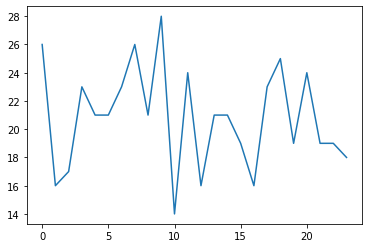

In [36]:
df['Hour'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()

### Logistic Regression


### Missing Values:


In [39]:
df_missing = (df.isnull().sum()/len(df)).sort_values(ascending=False)
df_missing.head()

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
dtype: float64

```
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

train_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage', 'Male', 
                   'Month', 'Day', 'Weekday', 'Hour']

numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage']

categorical_features = ['Male','Month', 'Day', 'Weekday', 'Hour']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
df_ohe = ohe.fit_transform(df[categorical_features])
df_ohe = pd.DataFrame(df_ohe, columns = [f'ohe_{i}' for i in
                                        range(df_ohe.shape[1])])
df = pd.concat([df,df_ohe], axis=1)
df = df.drop(categorical_features, axis =1)

y = df['Clicked on Ad']
X = df.drop(['Ad Topic Line', 'City', 'Country','Clicked on Ad'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
```

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

train_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage', 'Male', 
                   'Month', 'Day', 'Weekday', 'Hour']

numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

X = df[train_features]
y = df['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 9) (750,)
(250, 9) (250,)


In [41]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Weekday,Hour
968,-1.257137,0.226735,-1.465606,-1.247257,0,3,27,6,8
205,-0.427889,-0.798185,-1.316741,-1.346846,0,2,11,3,2
231,-1.150483,-0.456545,-1.783055,-0.993613,1,3,23,2,6
147,0.373591,0.568375,-0.373240,-1.637180,1,5,5,3,7
531,-0.729549,0.682255,-0.901863,-1.636952,1,4,4,0,22


In [42]:
model1 = LogisticRegression(solver='lbfgs')
model1.fit(x_train, y_train)
predictions_LR = model1.predict(x_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))


Logistic regression accuracy: 0.972

Confusion Matrix:
[[132   5]
 [  2 111]]


In [43]:
print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       134
           1       0.98      0.96      0.97       116

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



**Confusion Matrix:** The users that are predicted to click on commercials and the actually clicked were 111, the people who were predicted not to click on the commercials and actually did not click on them were 132.

The people who were predicted to click on commercial and actually did not click on them are 5, and the users who were not predicted to click on the commercials and actually clicked on them are 2.

We have only a few mislabelled points which is not bad from the given size of the dataset.

Classification Report:

From the report obtained, the precision & recall are 0.98 which depicts the predicted values are 98% accurate. Hence the probability that the user can click on the commercial is 0.98 which is a great precision value to get a good model.

In [44]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
predictions_DT = model2.predict(x_test)

print('\nDecisionTreeClassifier accuracy:', accuracy_score(predictions_DT, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_DT, y_test))


DecisionTreeClassifier accuracy: 0.944

Confusion Matrix:
[[124   4]
 [ 10 112]]


In [45]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       134
           1       0.92      0.97      0.94       116

    accuracy                           0.94       250
   macro avg       0.94      0.95      0.94       250
weighted avg       0.95      0.94      0.94       250



In [46]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(x_train, y_train)
predictions_XGB = model3.predict(x_test)

print('\nXGBClassifier accuracy:', accuracy_score(predictions_XGB, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_XGB, y_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier accuracy: 0.952

Confusion Matrix:
[[129   7]
 [  5 109]]


In [47]:
print(classification_report(y_test, predictions_XGB))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       134
           1       0.96      0.94      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



### Feature Importances

In [48]:
import lightgbm as lgb
from sklearn.model_selection import KFold
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', 
                           boosting_type = 'goss', 
                           n_estimators = 10000, 
                           class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X,
                                                                        y,
                                                                        test_size = 0.25, 
                                                                        random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, 
                                                                               valid_y)], 
              eval_metric = 'auc', verbose = 200)
    predictions_LGB = model1.predict(valid_features)

    print('\nLGB accuracy:', accuracy_score(predictions_LGB, valid_y))
    print('\nConfusion Matrix:')
    print(confusion_matrix(predictions_LGB, valid_y))
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.991583	valid_0's binary_logloss: 0.18709

LGB accuracy: 0.976

Confusion Matrix:
[[135   5]
 [  1 109]]
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.977257	valid_0's binary_logloss: 0.152826

LGB accuracy: 0.968

Confusion Matrix:
[[129   8]
 [  0 113]]


Our confusion matrix tells us that the total number of accurate predictions is 158 + 141 = 299. On the other hand, the number of incorrect predictions is 27 + 4 = 31. We can be satisfied with the prediction accuracy of our model.

It can be concluded that the Decision Tree model showed better performances in comparison to the Logistic Regression model. The confusion matrix shows us that the 308 predictions have been done correctly and that there are only 22 incorrect predictions. Additionally, Decision Tree accuracy is better by about 3% in comparison to the first regression model.

In [49]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

,feature,importance
0,Daily Time Spent on Site,110.5
3,Daily Internet Usage,86.5
2,Area Income,80.0
1,Age,45.0
8,Hour,17.5
6,Day,13.5
5,Month,5.0
7,Weekday,4.0
4,Male,2.0


In [50]:
feature_importances.head(10)

,feature,importance
0,Daily Time Spent on Site,110.5
3,Daily Internet Usage,86.5
2,Area Income,80.0
1,Age,45.0
8,Hour,17.5
6,Day,13.5
5,Month,5.0
7,Weekday,4.0
4,Male,2.0


In [51]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 0 features with 0.0 importance


,feature,importance
8,Hour,17.5
6,Day,13.5
5,Month,5.0
7,Weekday,4.0
4,Male,2.0


In [52]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 10 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

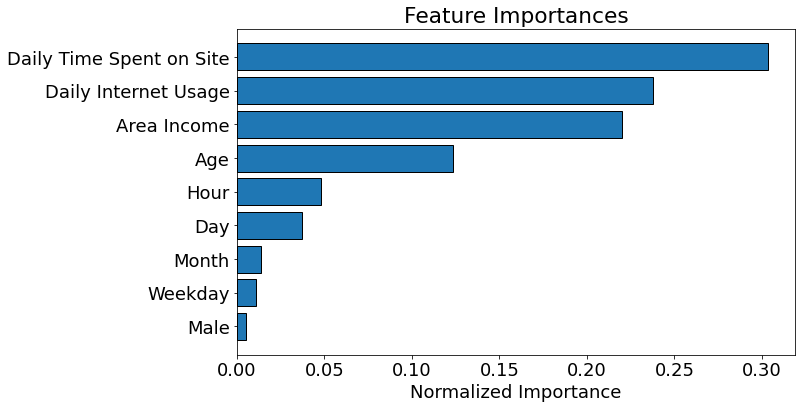

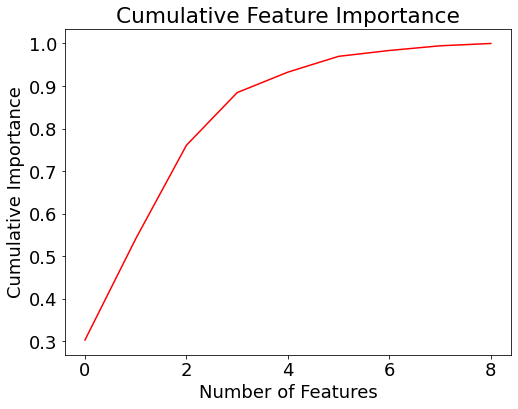

8 features required for 0.99 of cumulative importance


In [53]:
norm_feature_importances = plot_feature_importances(feature_importances,
                                                   threshold = 0.99)

### Reference:
1. https://www.kaggle.com/farhanmd29/predicting-customer-ad-clicks/notebook
2. https://www.kaggle.com/imprime/logistic-regression-with-ad-click-dataset/data